In [1]:
import warnings

import numpy as np

from HW1.coord_relaxer import LinearCoordRelaxer
from HW1.gradient_descent import gradient_descent
from HW1.visualize import draw_2D, draw_3D

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = {x^4 \over 1e7}$

In [2]:
def f(coord):
    return (coord[0] ** 4) / 1e7

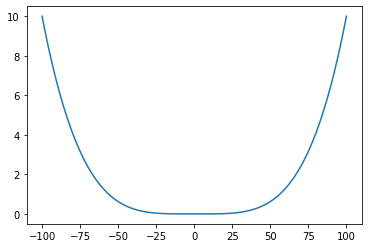

In [3]:
draw_2D(f)

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/gradient_descent.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[-8.86693553] 0.0006181504691172296
{'gradient_call_count': 1511, 'function_call_count': 26940, 'points': array([[array([-40.21240258]), 0.261480969868847],
       [array([-39.95230527]), 0.2547811968931471],
       [array([-39.69722237]), 0.24833645683608158],
       ...,
       [array([-8.87251393]), 0.0006197075105243743],
       [array([-8.86972341]), 0.0006189282552575447],
       [array([-8.86693553]), 0.0006181504691172296]], dtype=object)}


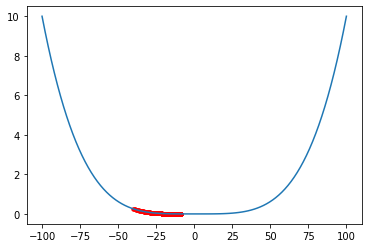

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, eps=1e-5))
    print(x, y)
    print(meta)

    draw_2D(f, meta["points"])

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [5]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

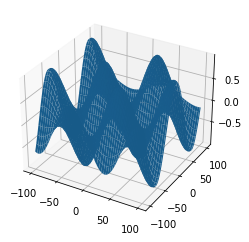

In [6]:
draw_3D(f)

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/gradient_descent.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[31.4159617   8.46619808] -0.9999999999980306
{'gradient_call_count': 65, 'function_call_count': 832, 'points': array([[array([43.88681205,  4.63612983]), -0.7969732426278101],
       [array([41.30750097,  5.331143  ]), -0.8693772487498732],
       [array([39.19808066,  5.94918693]), -0.9179302840444309],
       [array([37.50474186,  6.47156519]), -0.9492740747597429],
       [array([36.16290206,  6.8987009 ]), -0.9689810164866256],
       [array([35.108376  ,  7.24090221]), -0.9811613525303946],
       [array([34.28421001,  7.51142186]), -0.9886061733594746],
       [array([33.64208007,  7.7237123 ]), -0.9931268963011052],
       [array([33.14293979,  7.88938517]), -0.9958597579429598],
       [array([32.75529035,  8.01842257]), -0.9975083916731752],
       [array([32.45459129,  8.11862979]), -0.9985009592260677],
       [array([32.22130909,  8.19648489]), -0.999098439410709],
       [array([32.04051115,  8.25681875]), -0.9994576251573284],
       [array([31.90027983,  8.30367278]), -

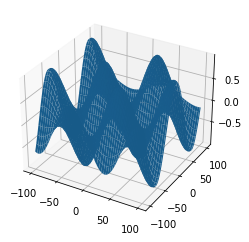

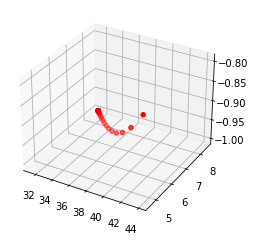

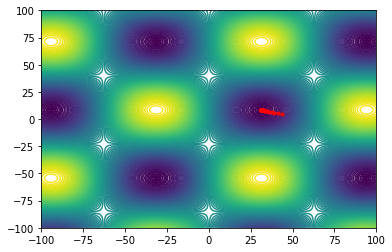

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2, lr=0.9, coord_relaxer=LinearCoordRelaxer(f, eps=1e-3))
    print(xs, y)
    print(meta)

    draw_3D(f, meta["points"])